# <center><font color = red>Anoop Mettu - Project 4 </font></center>
### <center>Data Set: Tourism company - 'Visit With Us' </center>

- Name: Anoop Mettu
- Date: Aug 2021
- Project: Ensemble Techniques

## Project Introduction: 
This is the 4th project in the AIML course curriculum. It is intended to help with
1. Understand and appreciate the most widely used Ensemble Technique - Bagging, Boosting, and Stacking
2. Problem recognition and building predictive models in the context of business decision-making.
3. Assessing the model performance using different metrics.
4. Tuning models to improve model performance

#### Dataset intro: 
The dataset holds details about the existing and potential customers of a travel company 'visit with us'

#### Project Goal:
Our goal for this project is to build a model to predict which customer is potentially going to purchase the newly introduced travel package.

# <center><font color = magenta> Python Code </font></center>

## Required packages:

#### Here are the packages needed for this project

__Basic libraries__
1. __Warnings:__ To ensure smooth flow of plotting commands without warning interuptions
2. __Numpy:__ For numerical operations
3. __Pandas:__ For creating & manipulating dataframes

__EDA Libraries:__
1. __Matplotlib:__ For basic data vizualisations
2. __Seaborn:__ For improving the visualizations

__Predictive Model building Libraries__
1. __Decision Tree Classifier:__ To build decision trees
2. __SK Learn Ensemble:__ To build ensemble models using - bagging, boosting
3. __XG Boost:__ To perform extreme gradient boosting
4. __SK Learn Metrics:__ To test and understand the model performance
5. __SK Learn Grid Search:__ To perform model tuning
6. __Train Test Split:__ For splitting the dataset into training and testing groups and comparing model efficiency

In [1]:
# Basic libararies
import warnings
warnings.filterwarnings("ignore")
import numpy as np   
import pandas as pd  

# EDA libraries
import seaborn as sns
sns.set(font_scale=1.1)
import matplotlib.pyplot as plt

# Modeling libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score

import scipy.stats as stats

#### Importing the dataset and getting a first look at the data

In [2]:
df = pd.read_excel("Tourism.xlsx", sheet_name=1) #Loading the dataset and creating a pandas data frame

df_backup = df.copy() #Creating a copy to have original dataset accesible in case of any mistakes.

In [3]:
df.head() #Examining the data & columns

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### Random rows

- Picking __10 random rows__ of the data and checking entries to understand the data from each columns and verify consistency

In [4]:
df.sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
436,200436,1,NaN,Self Enquiry,1,16.0,Small Business,Male,2,5.0,Basic,3.0,Married,1.0,0,5,0,0.0,Executive,18408.0
1271,201271,1,21.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,Basic,4.0,Single,2.0,0,5,1,1.0,Executive,17679.0
856,200856,0,20.0,Self Enquiry,1,9.0,Salaried,Male,2,4.0,Basic,3.0,Single,2.0,0,3,0,1.0,Executive,18033.0
4054,204054,1,33.0,Self Enquiry,1,16.0,Small Business,Female,3,4.0,Basic,5.0,Unmarried,2.0,0,4,1,1.0,Executive,22878.0
3437,203437,0,26.0,Self Enquiry,3,25.0,Salaried,Male,4,2.0,Deluxe,3.0,Divorced,4.0,0,1,0,1.0,Manager,24910.0
1727,201727,0,40.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,King,3.0,Married,1.0,0,5,1,0.0,VP,34436.0
4514,204514,0,33.0,Self Enquiry,1,11.0,Salaried,Female,4,5.0,Deluxe,3.0,Married,3.0,0,4,1,2.0,Manager,24840.0
4165,204165,0,40.0,Company Invited,1,9.0,Large Business,Female,4,4.0,Standard,3.0,Single,2.0,0,1,1,3.0,Senior Manager,29616.0
1117,201117,0,34.0,Self Enquiry,1,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Married,1.0,0,4,1,0.0,Manager,20484.0
2536,202536,0,31.0,Self Enquiry,3,11.0,Small Business,Female,4,5.0,Deluxe,4.0,Married,3.0,1,3,1,2.0,Manager,23887.0


#### Dropping 'Customer ID'
- Since we don't plan on using the 'Customer ID' for our analysis, we can safely drop it.

In [5]:
df.drop('CustomerID',axis=1, inplace=True)

### 'info()' function

Understanding multiple aspects of each of the columns, including
1. Number of rows & columns. 
2. Data types
3. Number of non-null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

Notes:
- Number of Rows: 4888
- Number of Columns: 19

The columns are essentially of 3 types - Integer, float, object. By the end of pre-processing we will need to convert all of these columns into a numeric type to get the data ready for modelling. Let us create a list of columns we are interested in.
- List of columns of type 'object'
- List of columns with categorical variables
- List of columns with null values

### 'object' type columns

In [7]:
obj_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        obj_col.append(i)

print(f"\nThere are {len(obj_col)} columns of type 'object'. They are: \n\n{obj_col}")


There are 6 columns of type 'object'. They are: 

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


#### Categorical columns

In [8]:
df.nunique(dropna=False)

ProdTaken                      2
Age                           45
TypeofContact                  3
CityTier                       3
DurationOfPitch               35
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              7
ProductPitched                 5
PreferredPropertyStar          4
MaritalStatus                  4
NumberOfTrips                 13
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       5
Designation                    5
MonthlyIncome               2476
dtype: int64

In [9]:
cat_col = ['ProdTaken', 'TypeofContact', 
           'CityTier','Occupation', 
           'Gender', 'ProductPitched', 
           'PreferredPropertyStar', 'MaritalStatus', 
           'Passport', 'OwnCar',
           'Designation'
          ]

It appears from the info command that the dataset has a significant number of null values. Let us explore more with the 'isnull()' function

In [10]:
df.isnull().sum().sort_values()

ProdTaken                     0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
MaritalStatus                 0
Designation                   0
NumberOfPersonVisiting        0
ProductPitched                0
Occupation                    0
CityTier                      0
Gender                        0
TypeofContact                25
PreferredPropertyStar        26
NumberOfFollowups            45
NumberOfChildrenVisiting     66
NumberOfTrips               140
Age                         226
MonthlyIncome               233
DurationOfPitch             251
dtype: int64

Columns containing null values

In [11]:
null_col = pd.DataFrame(df.isnull().sum())
null_col = null_col[null_col[0]>0].index.tolist()

print(f"\nThere are {len(null_col)} columns with null values. They are: \n\n{null_col}")


There are 8 columns with null values. They are: 

['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']


Rows containing null values

In [12]:
null_rows_df = df.isnull().sum(axis=1)

null_rows = null_rows_df[null_rows_df>0].index.tolist()

print(f"\nThere are {len(null_rows)} rows containing null values.")
print("Grouping of rows by Number of null values:")

pd.DataFrame(df.isnull().sum(axis=1).value_counts().rename_axis('Num Of Null Values').reset_index(name='Num of Rows')) # Checking the total null values by row


There are 760 rows containing null values.
Grouping of rows by Number of null values:


,Num Of Null Values,Num of Rows
0,0,4128
1,1,533
2,2,202
3,3,25


In [13]:
for i in np.arange(1,4):
    print(f"\n\n\nThe rows with exactly {i} null values have null values in columns:\n")
    nul_v = df[null_rows_df==i].isnull().sum()
    print(nul_v[nul_v>0])




The rows with exactly 1 null values have null values in columns:

Age                          96
DurationOfPitch             154
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome                 6
dtype: int64



The rows with exactly 2 null values have null values in columns:

Age                130
DurationOfPitch     72
MonthlyIncome      202
dtype: int64



The rows with exactly 3 null values have null values in columns:

TypeofContact      25
DurationOfPitch    25
MonthlyIncome      25
dtype: int64


# EDA & Pre-processing

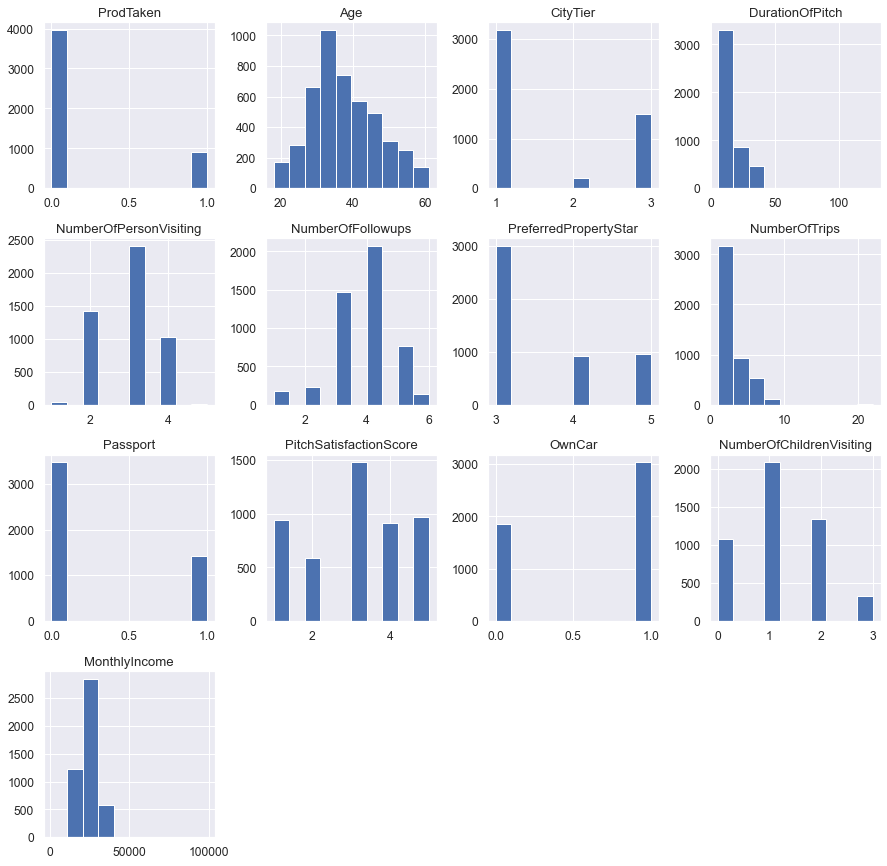

In [14]:
df.hist(figsize=(15,15));

### Correlation matrix

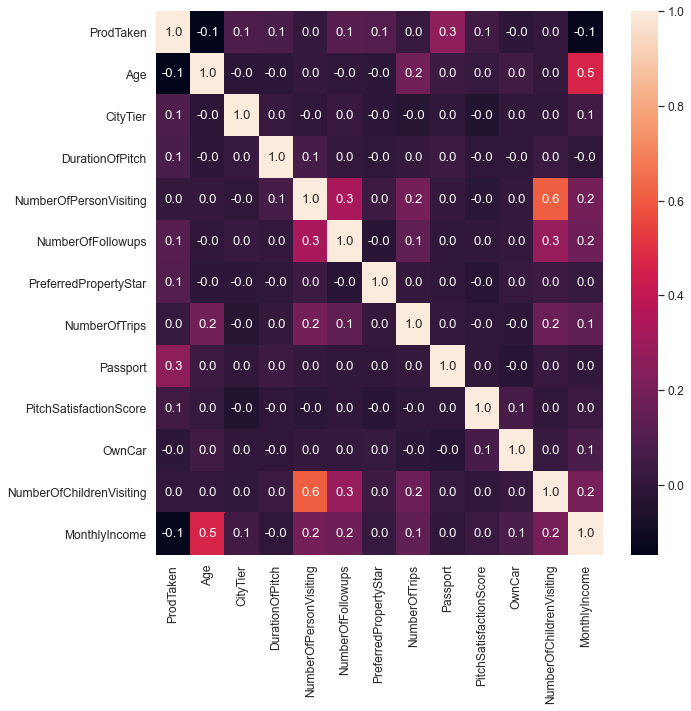

In [15]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt="0.1f");

Null columns corelations

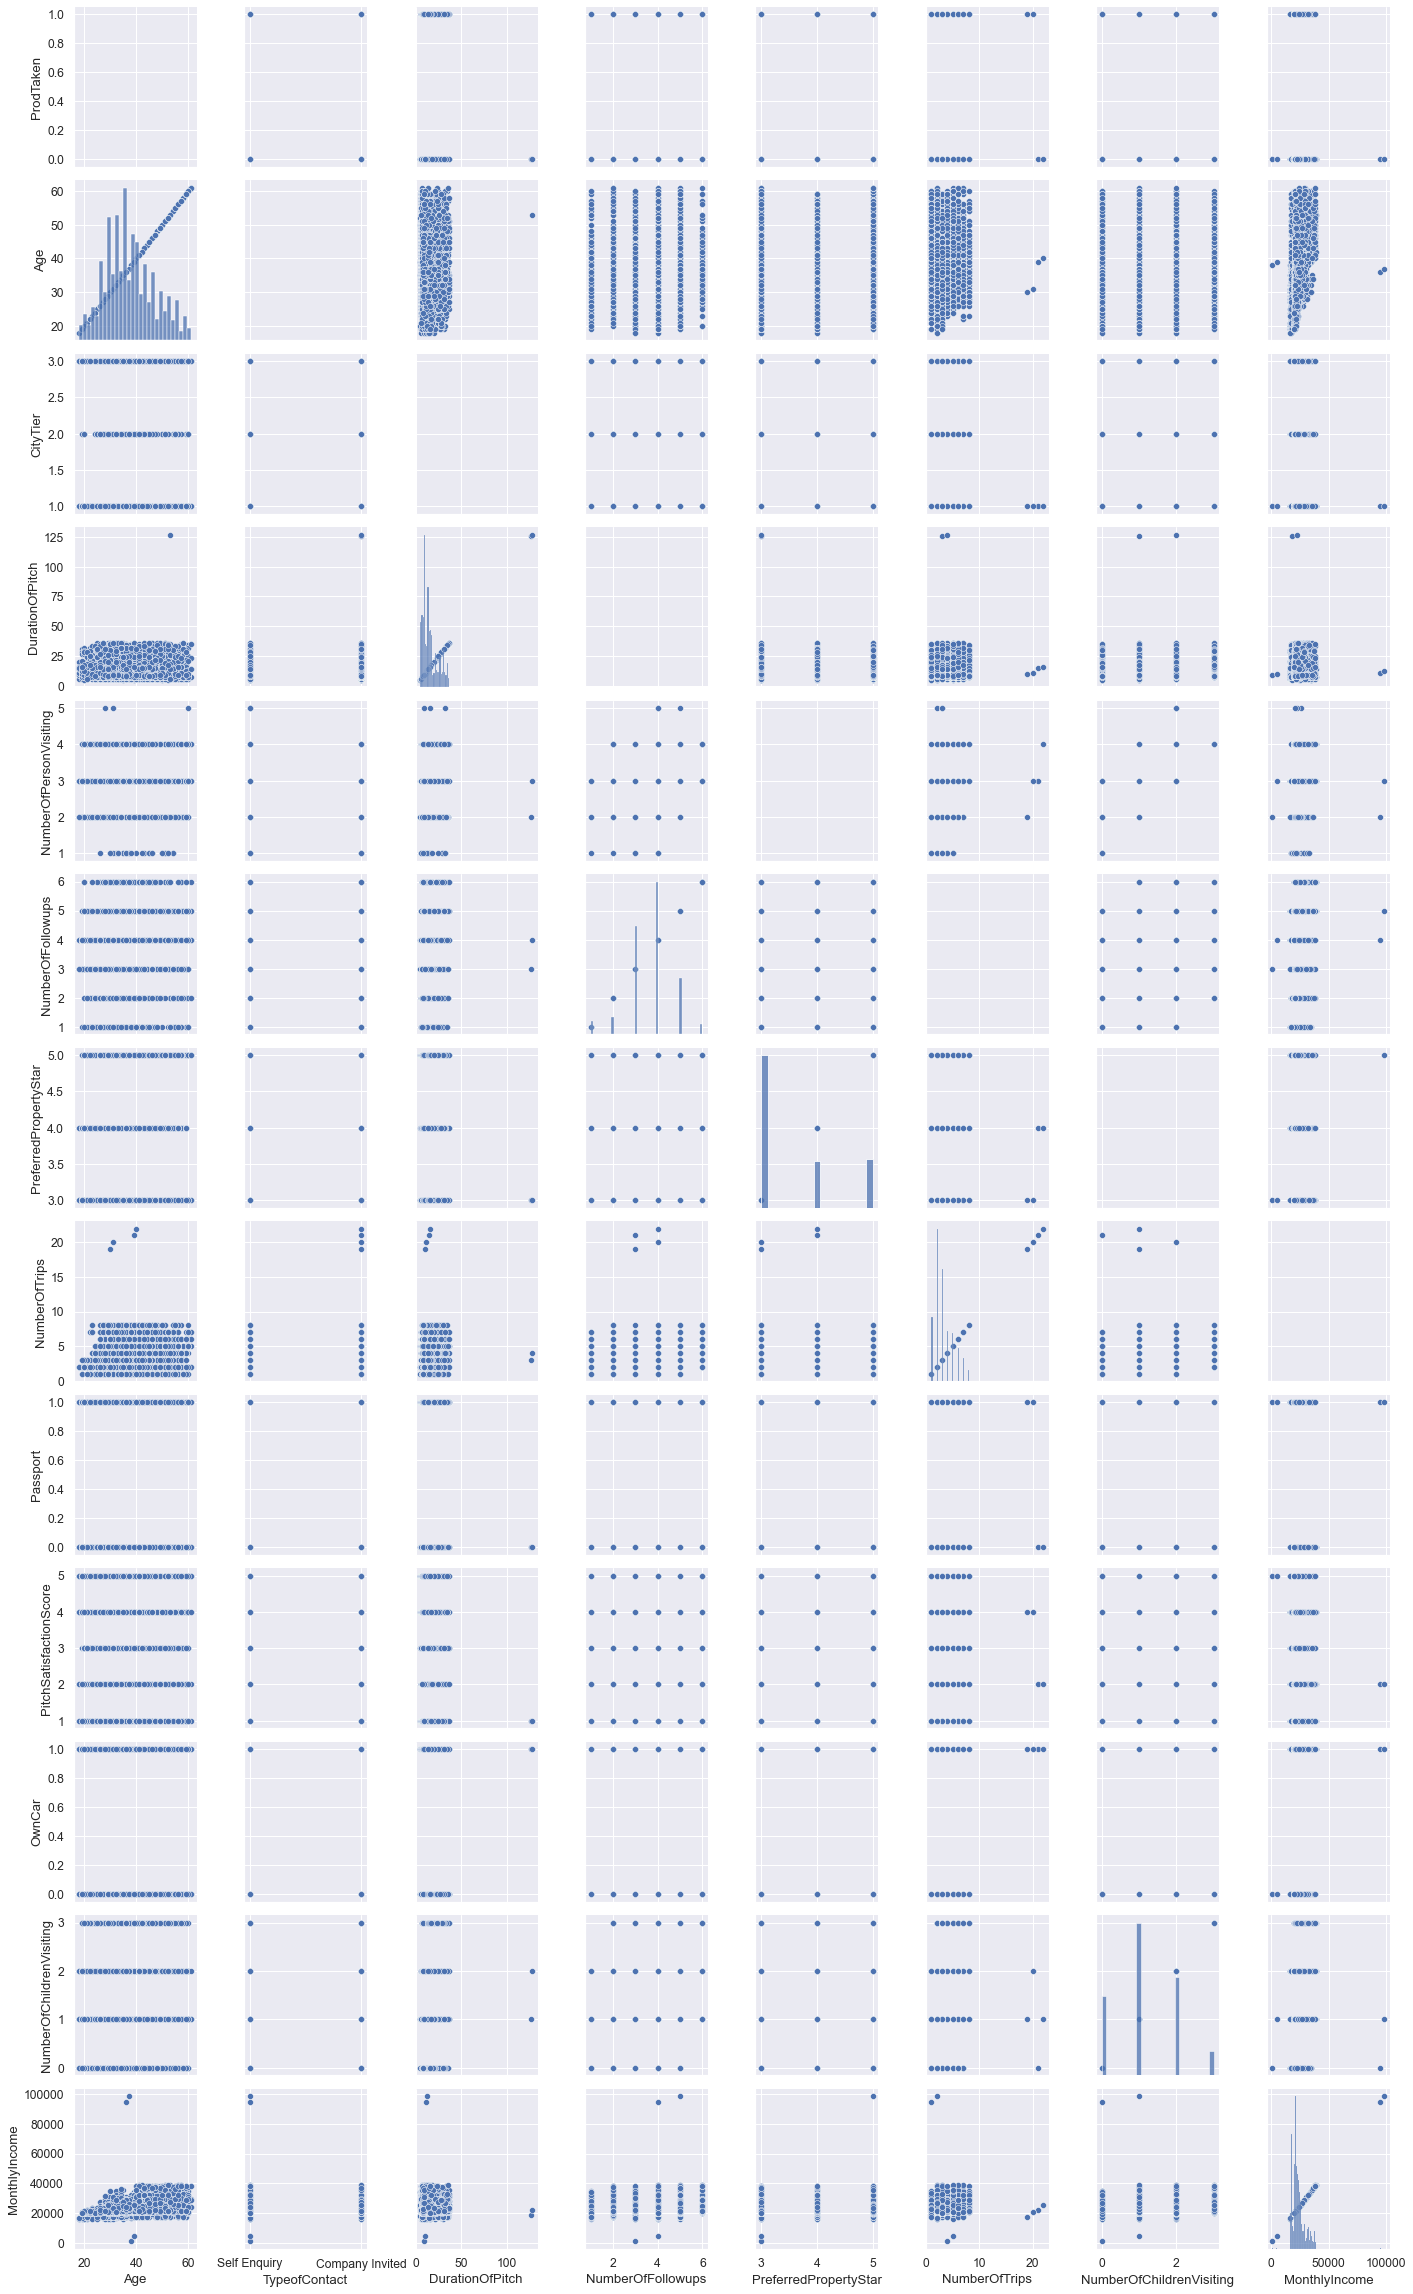

In [16]:
sns.pairplot(df,x_vars=null_col);

### Processing 'object' type columns

In [17]:
print(f"\nThere are {len(obj_col)} columns of type 'object'. They are: \n\n{obj_col}")


There are 6 columns of type 'object'. They are: 

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [18]:
for i in obj_col:
    print(f"\n\nValue counts for column - '{i}': \n{df[i].value_counts(dropna=False)}\n")



Value counts for column - 'TypeofContact': 
Self Enquiry       3444
Company Invited    1419
NaN                  25
Name: TypeofContact, dtype: int64



Value counts for column - 'Occupation': 
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64



Value counts for column - 'Gender': 
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64



Value counts for column - 'ProductPitched': 
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64



Value counts for column - 'MaritalStatus': 
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64



Value counts for column - 'Designation': 
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



### Insights:
- __'Type of contact' column:__ has missing values. We shall explore this further.
- __Gender column:__ has two catagories for Female ('Female' & 'Fe Male'), perhaps due to an error in spelling.

#### 1. Type of contact column

In [19]:
df[df['TypeofContact'].isnull()].isnull().sum()

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch             25
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome               25
dtype: int64

Insights:
- Rows with null values in 'Type of Contact' column also have null values in 'Duration of pitch' and 'MonthlyIncome'
- Number of null values is very low 25 in over 4000, and creating a new category 'empty' isn't necessary

Hence we can safely drop rows with null values in 'Type of Contact' column

In [20]:
df.drop(df[df['TypeofContact'].isnull()].index, axis=0, inplace=True)
df.TypeofContact.value_counts(dropna=False)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

#### 2. Gender column:

In [21]:
df['Gender'].replace('Fe Male', 'Female', inplace=True)
df['Gender'].value_counts()

Male      2901
Female    1962
Name: Gender, dtype: int64

### Processing Categorical columns

In [22]:
df[cat_col].isnull().sum()

ProdTaken                 0
TypeofContact             0
CityTier                  0
Occupation                0
Gender                    0
ProductPitched            0
PreferredPropertyStar    26
MaritalStatus             0
Passport                  0
OwnCar                    0
Designation               0
dtype: int64

In [23]:
df[df.PreferredPropertyStar.isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


In [24]:
df.groupby(['NumberOfPersonVisiting','Gender'])['PreferredPropertyStar'].describe()

count      mean       std  min   25%  50%  \
NumberOfPersonVisiting Gender                                               
1                      Female    21.0  3.857143  0.963624  3.0  3.00  3.0   
                       Male      18.0  3.333333  0.594089  3.0  3.00  3.0   
2                      Female   553.0  3.585895  0.801007  3.0  3.00  3.0   
                       Male     847.0  3.519481  0.763707  3.0  3.00  3.0   
3                      Female   953.0  3.603358  0.803138  3.0  3.00  3.0   
                       Male    1430.0  3.569930  0.796470  3.0  3.00  3.0   
4                      Female   421.0  3.615202  0.801283  3.0  3.00  3.0   
                       Male     591.0  3.632826  0.828848  3.0  3.00  3.0   
5                      Female     2.0  4.500000  0.707107  4.0  4.25  4.5   
                       Male       1.0  3.000000       NaN  3.0  3.00  3.0   

                                75%  max  
NumberOfPersonVisiting Gender             
1                      Female  5.00  5.0  
                       Male    3.75  5.0  
2                      Female  4.00  5.0  
                       Male    4.00  5.0  
3                      Female  4.00  5.0  
                       Male    4.00  5.0  
4                      Female  4.00  5.0  
                       Male    4.00  5.0  
5                      Female  4.75  5.0  
                       Male    3.00  3.0

__Insights:__ It appears from analysis that 
1. Preferred Property star does NOT have strong co-relation with any other columns in the data set
2. we can only loosely predict Preferred property star from other columns (best from - Number of people visiting and Gender)
3. The number of null values is low 26 of over 4800 rows.

__Conlusion:__ Hence we shall proceed to delete rows with null values in 'Prefered property star'

In [25]:
df.drop(df[df['PreferredPropertyStar'].isnull()].index, axis=0, inplace=True)
df.PreferredPropertyStar.value_counts(dropna=False)

3.0    2974
5.0     951
4.0     912
Name: PreferredPropertyStar, dtype: int64

### Processing numerical columns

In [26]:
df.isnull().sum().sort_values()

ProdTaken                     0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
MaritalStatus                 0
PreferredPropertyStar         0
Designation                   0
ProductPitched                0
Gender                        0
Occupation                    0
CityTier                      0
TypeofContact                 0
NumberOfPersonVisiting        0
NumberOfFollowups            45
NumberOfChildrenVisiting     66
NumberOfTrips               140
MonthlyIncome               208
DurationOfPitch             226
Age                         226
dtype: int64

#### 1. Age

In [27]:
df[df.Age.isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,1,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2413,1,NaN,Self Enquiry,3,21.0,Small Business,Male,2,5.0,Deluxe,3.0,Married,7.0,1,1,0,1.0,Manager,18423.0
2427,1,NaN,Self Enquiry,3,22.0,Small Business,Male,3,3.0,Standard,3.0,Married,3.0,0,5,0,1.0,Senior Manager,18544.0
2430,1,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


In [28]:
df.groupby(['Gender','Designation'])['Age'].describe()

count       mean       std   min   25%   50%   75%  \
Gender Designation                                                           
Female AVP              160.0  48.000000  6.497218  29.0  43.0  48.0  53.0   
       Executive        630.0  33.225397  8.872887  18.0  27.0  32.0  37.0   
       Manager          681.0  37.684288  7.760488  21.0  32.0  37.0  42.0   
       Senior Manager   325.0  40.775385  8.974347  26.0  34.0  38.0  47.0   
       VP                72.0  48.722222  7.021541  27.0  44.0  50.0  53.0   
Male   AVP              182.0  48.049451  6.186134  33.0  43.0  49.0  53.0   
       Executive       1057.0  33.000000  8.480481  18.0  27.0  32.0  37.0   
       Manager          954.0  37.241090  7.814652  22.0  32.0  36.0  42.0   
       Senior Manager   415.0  40.390361  7.846468  19.0  35.0  39.0  46.0   
       VP               135.0  47.251852  5.568727  39.0  42.0  47.0  51.0   

                        max  
Gender Designation           
Female AVP             60.0  
       Executive       60.0  
       Manager         60.0  
       Senior Manager  61.0  
       VP              61.0  
Male   AVP             59.0  
       Executive       60.0  
       Manager         61.0  
       Senior Manager  61.0  
       VP              59.0

In [29]:
df['Age']=df.groupby(['Gender','Designation'])['Age'].transform(
    lambda x: x.fillna(np.ceil(x.median()))
)

df['Age'].value_counts(dropna=False)

32.0    339
36.0    273
35.0    237
37.0    222
34.0    208
31.0    201
30.0    199
33.0    188
38.0    176
29.0    176
41.0    153
39.0    151
40.0    146
28.0    145
42.0    140
27.0    136
43.0    130
46.0    121
45.0    115
44.0    103
26.0    102
51.0     88
47.0     86
50.0     86
25.0     73
52.0     66
48.0     64
49.0     64
55.0     64
53.0     62
54.0     61
56.0     55
24.0     53
22.0     46
23.0     46
59.0     43
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     25
18.0     14
61.0      9
Name: Age, dtype: int64

### 2. Monthly Income

In [30]:
df.MonthlyIncome.isnull().sum()

208

In [31]:
df[df.MonthlyIncome.isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
11,0,37.0,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,32.0,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,37.0,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
26,1,32.0,Company Invited,1,22.0,Salaried,Female,3,5.0,Basic,5.0,Single,2.0,1,4,1,2.0,Executive,NaN
44,0,37.0,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,1,34.0,Company Invited,3,NaN,Salaried,Female,2,5.0,Basic,3.0,Single,2.0,0,3,0,1.0,Executive,NaN
2399,1,37.0,Company Invited,3,19.0,Large Business,Female,2,3.0,Deluxe,4.0,Single,6.0,0,3,1,0.0,Manager,NaN
2410,1,32.0,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2430,1,32.0,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


In [32]:
df.groupby(['CityTier','Designation'])['MonthlyIncome'].describe()

count          mean          std      min       25%  \
CityTier Designation                                                            
1        AVP              212.0  32486.886792  2592.554119  26103.0  31101.00   
         Executive       1388.0  19889.252161  3138.543830  16009.0  17659.00   
         Manager          819.0  22446.366300  2520.939239   1000.0  20684.00   
         Senior Manager   436.0  26993.793578  2877.843504  17372.0  25252.00   
         VP               152.0  35812.565789  1818.773390  33061.0  34224.50   
2        AVP               10.0  33222.600000  2329.858088  29026.0  31931.25   
         Executive        104.0  20171.576923  3057.605773  16555.0  17703.50   
         Manager           38.0  22723.921053  1908.926264  19490.0  21272.00   
         Senior Manager    18.0  26716.222222  2094.327536  22988.0  25083.00   
         VP                19.0  35522.684211  1813.380577  33200.0  34141.00   
3        AVP              120.0  31724.933333  3263.196597  17705.0  29852.00   
         Executive        262.0  19829.916031  3070.610984  16052.0  17572.00   
         Manager          728.0  22838.516484  2451.207953  17086.0  20742.00   
         Senior Manager   287.0  26050.972125  2528.224015  17994.0  24071.00   
         VP                36.0  34673.388889  4194.136528  17517.0  33916.25   

                             50%       75%      max  
CityTier Designation                                 
1        AVP             32363.5  35093.25  36602.0  
         Executive       20701.0  21424.25  98678.0  
         Manager         22759.0  24109.00  37467.0  
         Senior Manager  26878.0  29024.75  36943.0  
         VP              34892.5  37822.00  38304.0  
2        AVP             32516.0  35386.50  36006.0  
         Executive       20769.0  21435.50  36539.0  
         Manager         22656.5  24732.00  25108.0  
         Senior Manager  26195.5  28628.00  29403.0  
         VP              34658.0  37522.00  37867.0  
3        AVP             31931.0  34105.00  37502.0  
         Executive       19969.0  21321.50  37868.0  
         Manager         23120.0  24302.50  36739.0  
         Senior Manager  25973.0  28012.50  34717.0  
         VP              34839.0  37475.75  38264.0

In [33]:
df['MonthlyIncome']=df.groupby(['CityTier','Designation'])['MonthlyIncome'].transform(
    lambda x:x.fillna(np.ceil(x.median()))
)
df['MonthlyIncome'].isnull().sum()

0

### Numer of Children visiting

In [34]:
df[df['NumberOfChildrenVisiting'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
165,0,50.0,Self Enquiry,1,17.0,Salaried,Female,2,3.0,King,4.0,Single,4.0,0,5,1,NaN,VP,34926.0
190,0,52.0,Self Enquiry,1,6.0,Salaried,Male,3,4.0,King,3.0,Divorced,1.0,0,2,1,NaN,VP,34999.0
568,1,55.0,Self Enquiry,1,8.0,Small Business,Male,3,3.0,King,5.0,Divorced,6.0,1,2,1,NaN,VP,34859.0
746,0,41.0,Company Invited,1,13.0,Salaried,Female,2,5.0,King,3.0,Married,2.0,0,4,1,NaN,VP,34973.0
749,1,52.0,Self Enquiry,3,8.0,Small Business,Female,2,5.0,King,3.0,Divorced,2.0,0,3,1,NaN,VP,34845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,0,53.0,Self Enquiry,3,10.0,Small Business,Male,3,5.0,Super Deluxe,5.0,Married,3.0,0,5,1,NaN,AVP,35534.0
4506,0,48.0,Self Enquiry,1,9.0,Salaried,Female,3,4.0,Super Deluxe,3.0,Married,3.0,1,4,1,NaN,AVP,35430.0
4530,0,52.0,Self Enquiry,3,33.0,Small Business,Female,4,4.0,Super Deluxe,3.0,Married,4.0,0,3,1,NaN,AVP,34985.0
4688,0,56.0,Company Invited,1,9.0,Small Business,Male,3,5.0,Super Deluxe,5.0,Single,2.0,0,3,1,NaN,AVP,35434.0


In [35]:
df.groupby(['NumberOfPersonVisiting','Age'])['NumberOfChildrenVisiting'].describe()

count      mean       std  min  25%  50%  75%  \
NumberOfPersonVisiting Age                                                   
1                      26.0    1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
                       30.0    2.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
                       31.0    1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
                       32.0    5.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
                       33.0    4.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
...                            ...       ...       ...  ...  ...  ...  ...   
4                      60.0    7.0  1.714286  0.755929  1.0  1.0  2.0  2.0   
                       61.0    3.0  1.000000  0.000000  1.0  1.0  1.0  1.0   
5                      28.0    1.0  2.000000       NaN  2.0  2.0  2.0  2.0   
                       31.0    1.0  2.000000       NaN  2.0  2.0  2.0  2.0   
                       60.0    1.0  2.000000       NaN  2.0  2.0  2.0  2.0   

                             max  
NumberOfPersonVisiting Age        
1                      26.0  0.0  
                       30.0  0.0  
                       31.0  0.0  
                       32.0  0.0  
                       33.0  0.0  
...                          ...  
4                      60.0  3.0  
                       61.0  1.0  
5                      28.0  2.0  
                       31.0  2.0  
                       60.0  2.0  

[151 rows x 8 columns]

In [36]:
df['NumberOfChildrenVisiting']=df.groupby(['NumberOfPersonVisiting','Age'])['NumberOfChildrenVisiting'].transform(
    lambda x:x.fillna(round(x.median()))
)
df['NumberOfChildrenVisiting'].value_counts(dropna=False)

1.0    2096
2.0    1349
0.0    1074
3.0     318
Name: NumberOfChildrenVisiting, dtype: int64

### Number of Followups

In [37]:
df[df['NumberOfFollowups'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
79,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
94,0,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Deluxe,3.0,Single,2.0,0,5,1,0.0,Manager,20010.0
96,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,1.0,0,4,1,0.0,Manager,19999.0
122,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Basic,4.0,Divorced,1.0,1,5,1,1.0,Executive,19963.0
135,0,36.0,Self Enquiry,1,12.0,Small Business,Male,2,NaN,Deluxe,4.0,Married,7.0,0,4,1,1.0,Manager,19941.0
174,0,45.0,Self Enquiry,3,10.0,Salaried,Female,1,NaN,Deluxe,5.0,Married,5.0,1,4,0,0.0,Manager,20006.0
317,1,52.0,Self Enquiry,1,14.0,Small Business,Male,2,NaN,Deluxe,4.0,Divorced,3.0,0,2,1,1.0,Manager,19941.0
322,0,32.0,Self Enquiry,1,8.0,Small Business,Female,3,NaN,Deluxe,3.0,Single,1.0,0,3,1,2.0,Manager,20055.0
376,0,51.0,Self Enquiry,3,20.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,5.0,0,3,0,1.0,Manager,19936.0
532,0,47.0,Self Enquiry,3,20.0,Small Business,Male,2,NaN,Deluxe,5.0,Single,3.0,0,2,0,1.0,Manager,19960.0


In [38]:
df.groupby(['NumberOfPersonVisiting','ProductPitched','PreferredPropertyStar'])['NumberOfFollowups'].describe()

count      mean  \
NumberOfPersonVisiting ProductPitched PreferredPropertyStar                    
1                      Basic          3.0                      5.0  4.000000   
                                      4.0                      2.0  3.000000   
                                      5.0                      2.0  3.000000   
                       Deluxe         3.0                     10.0  3.200000   
                                      4.0                      4.0  3.000000   
                                      5.0                      1.0  4.000000   
                       Standard       3.0                      5.0  3.000000   
                                      5.0                      2.0  4.000000   
                       Super Deluxe   3.0                      4.0  2.250000   
                                      5.0                      2.0  3.000000   
2                      Basic          3.0                    322.0  3.229814   
                                      4.0                    101.0  3.247525   
                                      5.0                     87.0  3.114943   
                       Deluxe         3.0                    304.0  3.368421   
                                      4.0                     91.0  3.175824   
                                      5.0                     82.0  3.109756   
                       King           3.0                     51.0  3.509804   
                                      4.0                     13.0  3.076923   
                                      5.0                     11.0  3.090909   
                       Standard       3.0                    126.0  3.277778   
                                      4.0                     35.0  3.428571   
                                      5.0                     48.0  3.375000   
                       Super Deluxe   3.0                     69.0  3.043478   
                                      4.0                     17.0  3.235294   
                                      5.0                     20.0  3.050000   
3                      Basic          3.0                    545.0  3.748624   
                                      4.0                    178.0  3.758427   
                                      5.0                    174.0  3.724138   
                       Deluxe         3.0                    528.0  3.827652   
                                      4.0                    150.0  3.853333   
                                      5.0                    159.0  3.566038   
                       King           3.0                     68.0  4.058824   
                                      4.0                     19.0  3.473684   
                                      5.0                     17.0  3.588235   
                       Standard       3.0                    213.0  3.887324   
                                      4.0                     65.0  3.753846   
                                      5.0                     85.0  3.823529   
                       Super Deluxe   3.0                    102.0  3.715686   
                                      4.0                     31.0  3.774194   
                                      5.0                     32.0  3.593750   
4                      Basic          3.0                    230.0  4.169565   
                                      4.0                     83.0  4.168675   
                                      5.0                     88.0  4.329545   
                       Deluxe         3.0                    218.0  4.064220   
                                      4.0                     59.0  4.355932   
                                      5.0                     77.0  3.987013   
                       King           3.0                     18.0  4.166667   
                                      4.0                      9.0  4.111111   
                                      5.0                    

In [39]:
df['NumberOfFollowups']=df.groupby(['NumberOfPersonVisiting',
                                    'ProductPitched',
                                    'PreferredPropertyStar'])['NumberOfFollowups'].transform(
    lambda x:x.fillna(np.ceil(x.median()))

)
df['NumberOfFollowups'].value_counts(dropna=False)

4.0    2068
3.0    1479
5.0     760
2.0     228
1.0     172
6.0     130
Name: NumberOfFollowups, dtype: int64

### 2. Duration of Pitch

In [40]:
df.DurationOfPitch.isnull().sum()

226

In [41]:
df[df.DurationOfPitch.isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
46,0,34.0,Company Invited,3,NaN,Small Business,Male,3,3.0,Deluxe,3.0,Single,1.0,0,5,1,1.0,Manager,19568.0
75,0,31.0,Self Enquiry,1,NaN,Salaried,Female,3,3.0,Deluxe,3.0,Single,2.0,0,5,0,1.0,Manager,22759.0
76,0,35.0,Self Enquiry,3,NaN,Small Business,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,1.0,Manager,23120.0
84,0,34.0,Self Enquiry,1,NaN,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,2.0,0,5,0,0.0,Manager,22759.0
103,0,34.0,Self Enquiry,1,NaN,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,19809.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4215,0,19.0,Self Enquiry,3,NaN,Small Business,Female,4,5.0,Basic,3.0,Single,3.0,0,1,0,3.0,Executive,19878.0
4427,1,21.0,Self Enquiry,1,NaN,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,1,5,1,2.0,Executive,19687.0
4641,0,19.0,Company Invited,1,NaN,Salaried,Male,4,4.0,Basic,3.0,Single,3.0,0,1,0,2.0,Executive,19729.0
4678,0,29.0,Self Enquiry,3,NaN,Small Business,Male,4,4.0,Basic,4.0,Married,3.0,0,5,0,3.0,Executive,19730.0


In [42]:
df.groupby(['Age','NumberOfPersonVisiting'])['DurationOfPitch'].describe()

count       mean        std   min   25%   50%  \
Age  NumberOfPersonVisiting                                                  
18.0 2                         4.0  13.250000   5.315073   9.0   9.0  12.0   
     3                        10.0  11.900000   3.142893   6.0  11.0  11.0   
19.0 2                        11.0  18.454545   9.729991   8.0   8.0  15.0   
     3                        11.0  11.818182   4.771125   6.0   9.0  10.0   
     4                         6.0  11.833333   3.060501   7.0  10.5  12.0   
...                            ...        ...        ...   ...   ...   ...   
60.0 3                        15.0  15.000000  10.127755   6.0   9.0  10.0   
     4                         7.0  11.000000   6.298148   7.0   8.0   9.0   
     5                         1.0  32.000000        NaN  32.0  32.0  32.0   
61.0 3                         6.0  17.000000   4.647580  14.0  14.0  14.0   
     4                         3.0  25.666667  16.165808   7.0  21.0  35.0   

                               75%   max  
Age  NumberOfPersonVisiting               
18.0 2                       16.25  20.0  
     3                       14.00  16.0  
19.0 2                       27.50  31.0  
     3                       16.00  21.0  
     4                       14.25  15.0  
...                            ...   ...  
60.0 3                       17.00  34.0  
     4                       10.00  25.0  
     5                       32.00  32.0  
61.0 3                       20.75  23.0  
     4                       35.00  35.0  

[151 rows x 8 columns]

In [43]:
df['DurationOfPitch']=df.groupby(['Age','NumberOfPersonVisiting'])['DurationOfPitch'].transform(
    lambda x: x.fillna(np.ceil(x.median()))
)
df['DurationOfPitch'].value_counts(dropna=False)

9.0      491
7.0      337
8.0      333
6.0      307
15.0     298
13.0     293
16.0     291
14.0     273
10.0     249
12.0     227
11.0     223
17.0     184
30.0      95
22.0      89
31.0      83
23.0      78
32.0      74
29.0      74
18.0      73
21.0      73
25.0      73
27.0      72
26.0      72
24.0      70
20.0      65
35.0      65
28.0      61
19.0      57
33.0      55
34.0      50
36.0      44
5.0        6
126.0      1
127.0      1
Name: DurationOfPitch, dtype: int64

### 4. Number of Trips

In [44]:
df[df['NumberOfTrips'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2469,0,54.0,Self Enquiry,1,12.0,Salaried,Female,3,4.0,King,3.0,Married,NaN,0,5,0,2.0,VP,37772.0
2473,0,47.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,King,5.0,Single,NaN,0,2,0,2.0,VP,37625.0
2506,0,51.0,Self Enquiry,1,14.0,Small Business,Female,3,5.0,King,3.0,Married,NaN,1,4,1,2.0,VP,37418.0
2549,0,60.0,Company Invited,2,9.0,Salaried,Female,3,5.0,King,3.0,Divorced,NaN,0,2,1,2.0,VP,37522.0
2550,0,51.0,Company Invited,1,7.0,Salaried,Female,4,4.0,King,4.0,Divorced,NaN,1,2,0,3.0,VP,36850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,1,45.0,Self Enquiry,3,16.0,Salaried,Male,4,5.0,Basic,5.0,Married,NaN,0,1,1,3.0,Executive,37868.0
4850,1,46.0,Self Enquiry,3,8.0,Salaried,Male,4,5.0,Deluxe,5.0,Married,NaN,0,4,1,3.0,Manager,36739.0
4851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0


In [45]:
df.groupby(['Age','NumberOfPersonVisiting'])['NumberOfTrips'].describe()

count      mean       std  min  25%  50%   75%  \
Age  NumberOfPersonVisiting                                                   
18.0 2                         4.0  2.000000  0.000000  2.0  2.0  2.0  2.00   
     3                        10.0  2.000000  0.000000  2.0  2.0  2.0  2.00   
19.0 2                        11.0  2.000000  0.000000  2.0  2.0  2.0  2.00   
     3                        11.0  2.090909  0.831209  1.0  1.5  2.0  3.00   
     4                        10.0  3.000000  0.000000  3.0  3.0  3.0  3.00   
...                            ...       ...       ...  ...  ...  ...   ...   
60.0 3                        13.0  4.000000  2.081666  2.0  2.0  4.0  6.00   
     4                         7.0  5.428571  1.133893  5.0  5.0  5.0  5.00   
     5                         1.0  2.000000       NaN  2.0  2.0  2.0  2.00   
61.0 3                         6.0  3.666667  2.581989  2.0  2.0  2.0  5.75   
     4                         3.0  5.666667  0.577350  5.0  5.5  6.0  6.00   

                             max  
Age  NumberOfPersonVisiting       
18.0 2                       2.0  
     3                       2.0  
19.0 2                       2.0  
     3                       3.0  
     4                       3.0  
...                          ...  
60.0 3                       7.0  
     4                       8.0  
     5                       2.0  
61.0 3                       7.0  
     4                       6.0  

[151 rows x 8 columns]

In [46]:
df['NumberOfTrips']=df.groupby(['Age','NumberOfPersonVisiting'])['NumberOfTrips'].transform(
    
    lambda x: x.fillna(np.ceil(x.median()))

)

df['NumberOfTrips'].value_counts(dropna=False)

2.0     1455
3.0     1102
1.0      613
4.0      553
5.0      476
6.0      316
7.0      214
8.0      104
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64

### Null Values summary:

In [47]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Numerical columns - Summary

Undrestanding the summary of numerical columns. Including:
- Count of non-null values
- Mean & Standard Deviation
- Minimum & 25th Percentile
- 50th Percentile (Median)
- 75th Percentile & Max

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4837.0,0.188340,0.391024,0.0,0.0,0.0,0.0,1.0
Age,4837.0,37.405417,9.113701,18.0,31.0,36.0,43.0,61.0
CityTier,4837.0,1.655158,0.917030,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4837.0,15.389911,8.345152,5.0,9.0,13.0,19.0,127.0
NumberOfPersonVisiting,4837.0,2.904900,0.724191,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4837.0,3.704155,0.995819,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4837.0,3.581766,0.797913,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4837.0,3.251809,1.827740,1.0,2.0,3.0,4.0,22.0
Passport,4837.0,0.292537,0.454974,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4837.0,3.076907,1.366123,1.0,2.0,3.0,4.0,5.0


### Outlier detection

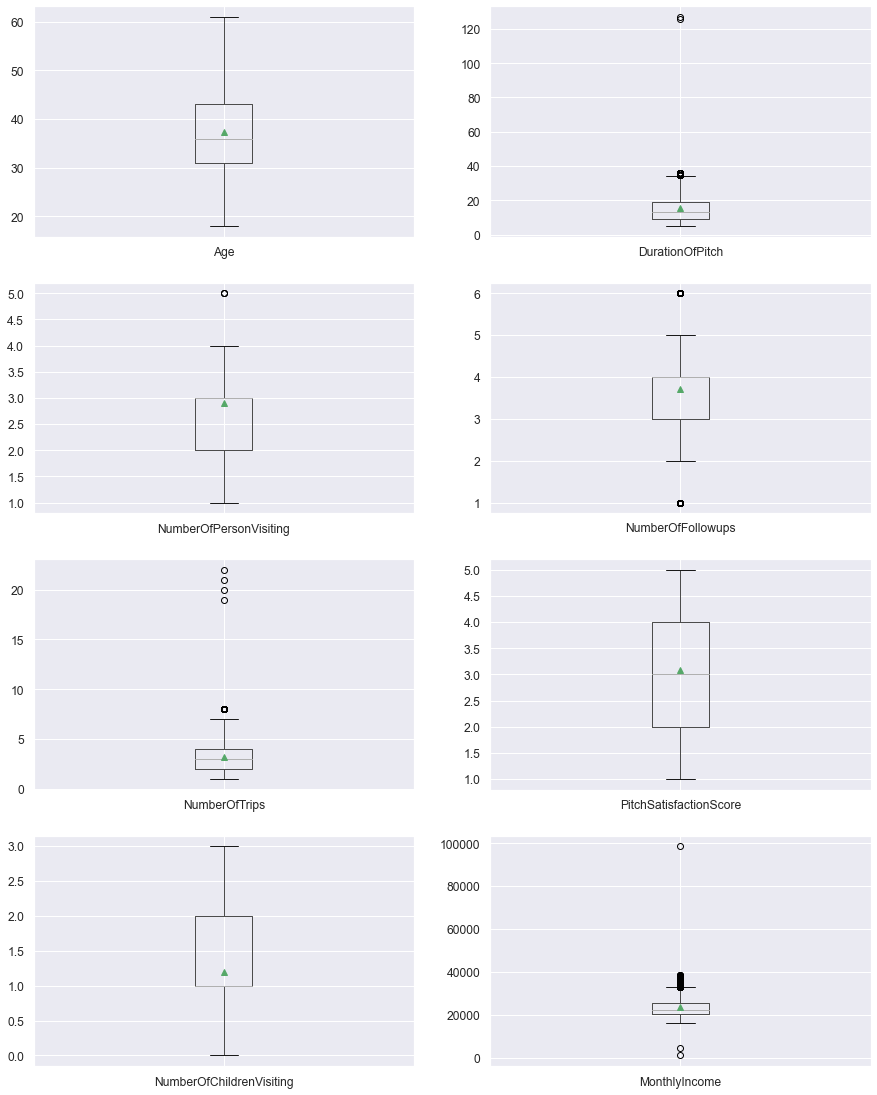

In [49]:
plt.figure(figsize=(15,50))
count=1
for i in df.drop(cat_col,axis=1):
    plt.subplot(10,2,count)
    df.boxplot([i], showmeans=True)
    count+=1

#### Outliers
From the boxplots we can see that columns - 'Duration of Pitch', 'Number of Followups', 'Number of Persons visiting', 'Number of Trips', and 'Monthly Income' have outliers. Let us examine them more.

In [50]:
outlier_col= ['DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips','MonthlyIncome']

Writing a user-defined function to help us in analysing numerical columns

In [51]:
def column_analysis(data, feature, figsize=(20,50), hue=None):
    
    print(f"\nThere are {data[feature].nunique()} unique values in column - '{i}'.")
    print(f"The value counts are as follows: \n{data[feature].value_counts(dropna=False).sort_index(ascending=True)} \n \n")
    
    print(f"Checking for outliers in column - '{feature}': \n")
    
    figure, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        )  # creating the 2 subplots
    sns.boxplot(data=data, x=data[feature], ax=ax_box, showmeans=True, hue=hue)
    sns.histplot(data=data, x=data[feature], ax=ax_hist, hue=hue)   
    ax_hist.axvline(np.mean(data[feature]), color='red', linestyle='--') #Adds mean to the histogram
    ax_hist.axvline(np.median(data[feature]), color='green', linestyle='solid') # Adds median to the histogram


There are 34 unique values in column - 'DurationOfPitch'.
The value counts are as follows: 
5.0        6
6.0      307
7.0      337
8.0      333
9.0      491
10.0     249
11.0     223
12.0     227
13.0     293
14.0     273
15.0     298
16.0     291
17.0     184
18.0      73
19.0      57
20.0      65
21.0      73
22.0      89
23.0      78
24.0      70
25.0      73
26.0      72
27.0      72
28.0      61
29.0      74
30.0      95
31.0      83
32.0      74
33.0      55
34.0      50
35.0      65
36.0      44
126.0      1
127.0      1
Name: DurationOfPitch, dtype: int64 
 

Checking for outliers in column - 'DurationOfPitch': 


There are 5 unique values in column - 'NumberOfPersonVisiting'.
The value counts are as follows: 
1      39
2    1400
3    2383
4    1012
5       3
Name: NumberOfPersonVisiting, dtype: int64 
 

Checking for outliers in column - 'NumberOfPersonVisiting': 


There are 6 unique values in column - 'NumberOfFollowups'.
The value counts are as follows: 
1.0     172
2.0   

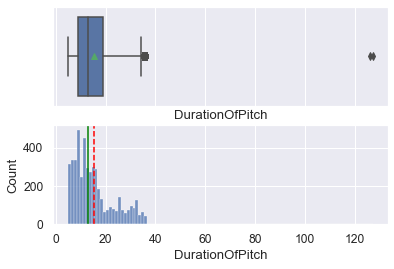

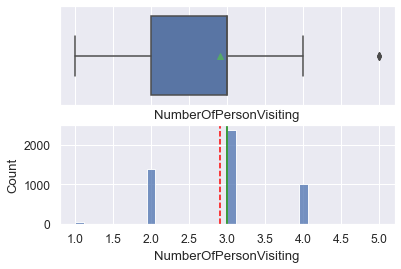

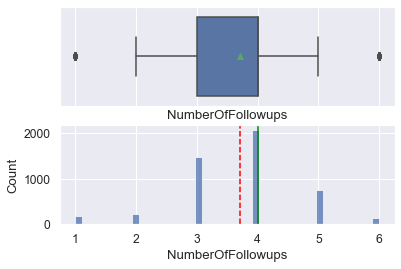

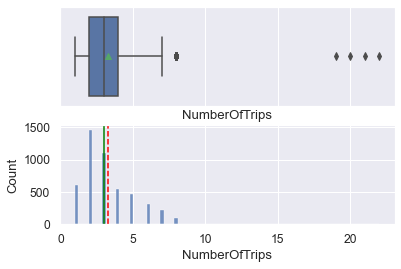

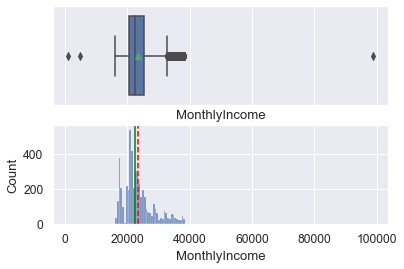

In [52]:
for i in outlier_col:
    column_analysis(df,i)

### Outlier elimination
- It appears from column analysis that columns - 'Number of Person visiting' and 'Number of Followups' are behaving more as categorical(descrete) variables and not as continuous variables. 
- Additionally, since the values are not far off, we will treat them as non-outliers. 
- Let us proceed to eliminate outliers from rest of the 3 columns

In [53]:
def show_outliers(col,a,b):
    df1=df[df[col]<a]
    df2=df[df[col]>b]
    df1=df1.append(df2)
    return df1

In [54]:
def drop_outliers(col,a,b):
    df3=show_outliers(col,a,b)
    df.drop(df3.index,axis=0,inplace=True)
    print(f"\nOutliers from colum '{col}' are dropped")
    return column_analysis(df,col)
    

In [55]:
show_outliers('DurationOfPitch',0,60)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,32.0,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0



Outliers from colum 'DurationOfPitch' are dropped

There are 32 unique values in column - 'MonthlyIncome'.
The value counts are as follows: 
5.0       6
6.0     307
7.0     337
8.0     333
9.0     491
10.0    249
11.0    223
12.0    227
13.0    293
14.0    273
15.0    298
16.0    291
17.0    184
18.0     73
19.0     57
20.0     65
21.0     73
22.0     89
23.0     78
24.0     70
25.0     73
26.0     72
27.0     72
28.0     61
29.0     74
30.0     95
31.0     83
32.0     74
33.0     55
34.0     50
35.0     65
36.0     44
Name: DurationOfPitch, dtype: int64 
 

Checking for outliers in column - 'DurationOfPitch': 



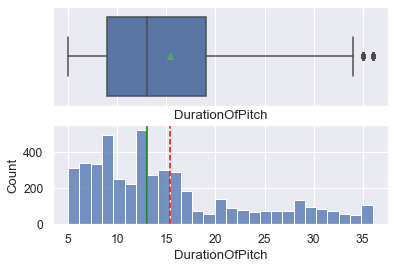

In [56]:
drop_outliers('DurationOfPitch',0,60)

In [57]:
show_outliers('NumberOfTrips',0,10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0



Outliers from colum 'NumberOfTrips' are dropped

There are 8 unique values in column - 'MonthlyIncome'.
The value counts are as follows: 
1.0     613
2.0    1455
3.0    1101
4.0     552
5.0     476
6.0     316
7.0     214
8.0     104
Name: NumberOfTrips, dtype: int64 
 

Checking for outliers in column - 'NumberOfTrips': 



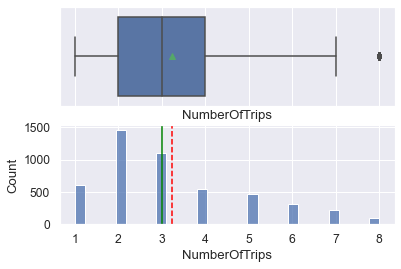

In [58]:
drop_outliers("NumberOfTrips",0,10)

In [59]:
show_outliers('MonthlyIncome',15000,60000)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0



Outliers from colum 'MonthlyIncome' are dropped

There are 2456 unique values in column - 'MonthlyIncome'.
The value counts are as follows: 
16009.0    2
16051.0    2
16052.0    2
16081.0    1
16091.0    1
          ..
38223.0    2
38244.0    2
38264.0    1
38291.0    1
38304.0    2
Name: MonthlyIncome, Length: 2456, dtype: int64 
 

Checking for outliers in column - 'MonthlyIncome': 



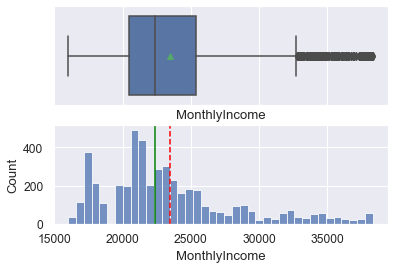

In [60]:
drop_outliers('MonthlyIncome',15000,60000)

Since 'Number of Persons visiting' and 'Number of Followups' are categorical columns and the outliers are very far, we choose to keep them. 

## Dummy variables

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4828 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4828 non-null   int64  
 1   Age                       4828 non-null   float64
 2   TypeofContact             4828 non-null   object 
 3   CityTier                  4828 non-null   int64  
 4   DurationOfPitch           4828 non-null   float64
 5   Occupation                4828 non-null   object 
 6   Gender                    4828 non-null   object 
 7   NumberOfPersonVisiting    4828 non-null   int64  
 8   NumberOfFollowups         4828 non-null   float64
 9   ProductPitched            4828 non-null   object 
 10  PreferredPropertyStar     4828 non-null   float64
 11  MaritalStatus             4828 non-null   object 
 12  NumberOfTrips             4828 non-null   float64
 13  Passport                  4828 non-null   int64  
 14  PitchSat

In [62]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,32.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [63]:
df = pd.get_dummies(df, columns=obj_col)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4828 entries, 0 to 4887
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ProdTaken                      4828 non-null   int64  
 1   Age                            4828 non-null   float64
 2   CityTier                       4828 non-null   int64  
 3   DurationOfPitch                4828 non-null   float64
 4   NumberOfPersonVisiting         4828 non-null   int64  
 5   NumberOfFollowups              4828 non-null   float64
 6   PreferredPropertyStar          4828 non-null   float64
 7   NumberOfTrips                  4828 non-null   float64
 8   Passport                       4828 non-null   int64  
 9   PitchSatisfactionScore         4828 non-null   int64  
 10  OwnCar                         4828 non-null   int64  
 11  NumberOfChildrenVisiting       4828 non-null   float64
 12  MonthlyIncome                  4828 non-null   f

In [65]:
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,1,0,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,1,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,1,0,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,1,0,0,0,0,1,0,0,0
4,0,32.0,1,8.0,2,3.0,4.0,1.0,0,5,...,0,1,0,0,0,0,1,0,0,0


# Modelling

### Splitting Data

In [66]:
# Splitting independent & dependent variables
x=df.drop('ProdTaken', axis=1)
y=df['ProdTaken']

In [67]:
# Creating Training & Testing sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1,shuffle=True,stratify=y)

In [68]:
x_train.shape, x_test.shape

((3379, 34), (1449, 34))

In [69]:
y_train.value_counts(), y_test.value_counts()

(0    2743
 1     636
 Name: ProdTaken, dtype: int64,
 0    1176
 1     273
 Name: ProdTaken, dtype: int64)

## 1. Decision Tree Model

In [70]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [71]:
print("Training accuracy : ",dtree.score(x_train, y_train))
print("Test set accuracy : ",dtree.score(x_test, y_test))

Training accuracy :  1.0
Test set accuracy :  0.8957902001380262


##### The Tree seems to be performing well on both training and testing data sets. However, there is definite overfitting owing to the fact that the model explains 100% of the variation in the training set

In [72]:
def model_performance(model, predictors, target):
    
    predicted_values = model.predict(predictors) # predicting using the independent variables
    
    model_accuracy = accuracy_score(target, predicted_values)  # Getting accuracy score
    model_recall = recall_score(target, predicted_values)  # Getting Recall score
    model_precision = precision_score(target, predicted_values)  # Getting Precision
    model_f1 = f1_score(target, predicted_values)  # Getting F1-score

    performance = pd.DataFrame(
        {
            "Accuracy": model_accuracy,
            "Recall": model_recall,
            "Precision": model_precision,
            "F1": model_f1,
        },
        index=['Score'],
    )

    return performance

In [73]:
def model_matrix(model, predictors, target):
    
    predicted_values = model.predict(predictors) # predicting using the independent variables
    
    cm = confusion_matrix(target, predicted_values)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True Values")
    plt.xlabel("Predicted Values")

In [74]:
model_performance(dtree,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.89579,0.754579,0.710345,0.731794


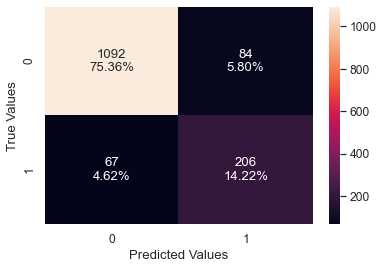

In [75]:
model_matrix(dtree,x_test,y_test)

### Decision tree tuning

In [76]:
dtree_tuned = DecisionTreeClassifier(random_state=1)
dtree_tuned.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [77]:
dtree_tuned = DecisionTreeClassifier(random_state=1)

parameters = {"max_depth": [None,5, 10, 15],
              "criterion": ["entropy", "gini"],
              "min_impurity_decrease": [0.00001, 0.0001, 0.01],
             }

In [78]:
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

In [79]:
# Selecting the best estimator
dtree_tuned = grid_obj.best_estimator_

# Creating the best fit model
dtree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=1e-05,
                       random_state=1)

In [80]:
model_performance(dtree_tuned,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.887509,0.761905,0.679739,0.71848


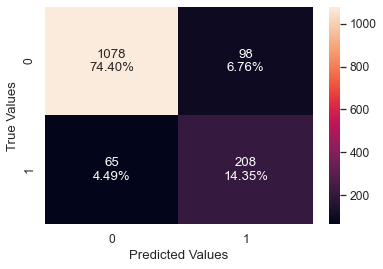

In [81]:
model_matrix(dtree_tuned,x_test,y_test)

Function to compute performance metrics for classification model

# Bagging

In [82]:
bagging_model = BaggingClassifier(random_state=1)
bagging_model.fit(x_train,y_train)

BaggingClassifier(random_state=1)

### Bagging performance on 'test set'

In [83]:
model_performance(bagging_model,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.910973,0.652015,0.839623,0.734021


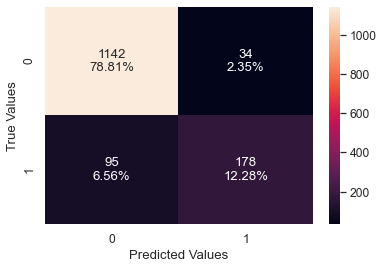

In [84]:
model_matrix(bagging_model,x_test,y_test)

### Bagging Tuned

In [85]:
bagging_tuned = BaggingClassifier(random_state=1)
bagging_tuned.fit(x_train,y_train)

BaggingClassifier(random_state=1)

In [86]:
bagging_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.2,0.4,0.6,0.8,1], 
              'max_features': [0.2,0.4,0.6,0.8,1],
              'n_estimators' : [5,10,15,20,55,100],
             }

In [87]:
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

In [88]:
# Selecting the best estimator
bagging_tuned = grid_obj.best_estimator_

# Creating the best fit model
bagging_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=100,
                  random_state=1)

In [89]:
model_performance(bagging_tuned,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.912353,0.637363,0.861386,0.732632


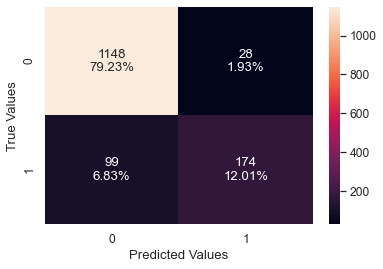

In [90]:
model_matrix(bagging_tuned,x_test,y_test)

# Random forest

In [91]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [92]:
model_performance(rf_model,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.906142,0.575092,0.887006,0.697778


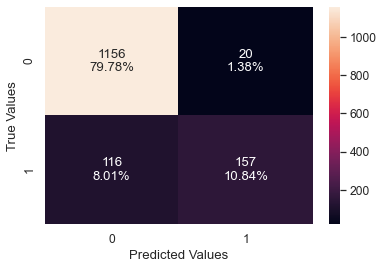

In [93]:
model_matrix(rf_model,x_test,y_test)

### Tuning

In [94]:
rf_tuned = RandomForestClassifier(random_state=1)

parameters = {'max_samples': [0.4,0.8,1.0], 
              'max_features': [0.4,0.8,1.0],
              'n_estimators' : [5,20,50,100],
              'min_samples_leaf': [2,4,6]
             }

In [95]:
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

In [96]:
# Selecting the best estimator
rf_tuned = grid_obj.best_estimator_

# Creating the best fit model
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=1.0, max_samples=0.8, min_samples_leaf=2,
                       random_state=1)

In [97]:
model_performance(rf_tuned,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.900621,0.615385,0.811594,0.7


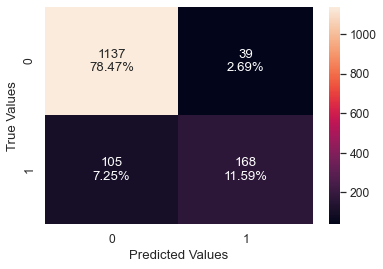

In [98]:
model_matrix(rf_tuned,x_test,y_test)

# Boosting

### Adaboost

In [99]:
ab_model = AdaBoostClassifier(random_state=1)
ab_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [100]:
model_performance(ab_model,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.833678,0.333333,0.606667,0.43026


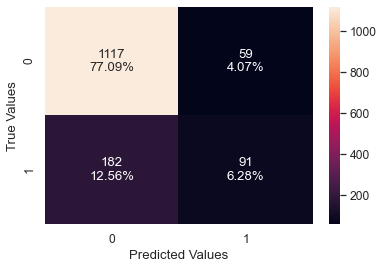

In [101]:
model_matrix(ab_model,x_test,y_test)

#### Adaboost Tuning

In [102]:
ab_tuned = AdaBoostClassifier(random_state=1)

parameters = {'base_estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
              'n_estimators' : [10,20,50,100],
              'learning_rate': np.arange(0.1,2,0.2)
             }

In [103]:
grid_obj = GridSearchCV(ab_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

In [104]:
# Selecting the best estimator
ab_tuned = grid_obj.best_estimator_

# Creating the best fit model
ab_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9000000000000001, n_estimators=100,
                   random_state=1)

In [105]:
model_performance(ab_tuned,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.881297,0.59707,0.724444,0.654618


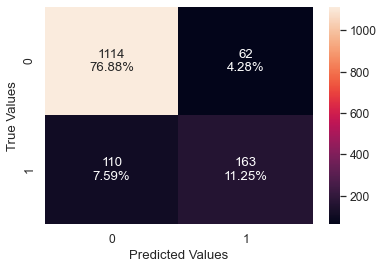

In [106]:
model_matrix(ab_tuned,x_test,y_test)

### GradientBoost

In [107]:
gb_model = GradientBoostingClassifier(random_state=1)
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [108]:
model_performance(gb_model,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.862664,0.410256,0.746667,0.529551


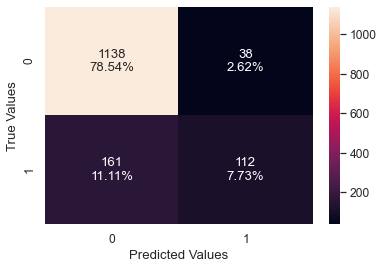

In [109]:
model_matrix(gb_model,x_test,y_test)

#### Gradient Boost Tuning

In [110]:
gb_tuned = GradientBoostingClassifier(random_state=1)

parameters = {'subsample': [0.6,0.8,1], 
              'max_features': [0.6,0.8,1],
              'n_estimators' : [20,50,100,200],
             }

In [111]:
grid_obj = GridSearchCV(gb_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

In [112]:
# Selecting the best estimator
gb_tuned = grid_obj.best_estimator_

# Creating the best fit model
gb_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.8)

In [113]:
model_performance(gb_tuned,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.864734,0.454212,0.725146,0.558559


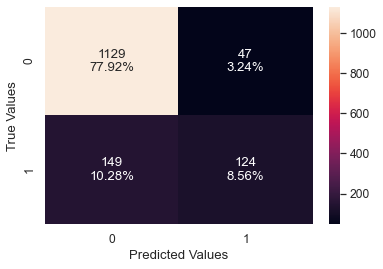

In [114]:
model_matrix(gb_tuned,x_test,y_test)

### XGBoost

In [115]:
xgb_model = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [116]:
model_performance(xgb_model,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.915804,0.681319,0.841629,0.753036


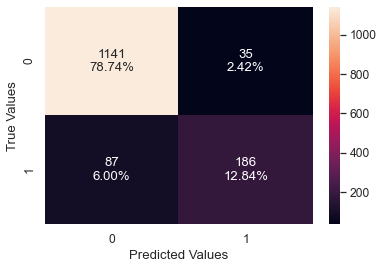

In [117]:
model_matrix(xgb_model,x_test,y_test)

#### XGBosst Tuning
Tried XGB but having time complexity issues on my 2017 intel i5

# Stacking

In [118]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Ada Boosting', ab_tuned),('Gradient Boosting', gb_tuned),('XGBoosting', xgb_model)]

In [119]:
stacking_model=StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(),cv=5)
stacking_model.fit(x_train,y_train)

[00:53:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       min_impurity_decrease=1e-05,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=1.0,
                                                       max_samples=0.8,
                                                       min_samples_leaf=2,
                                                       random_state=1)),
                               ('Ada Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=0.9...
                                                 importance_type='gain',
                                                 intera

In [120]:
model_performance(stacking_model,x_test,y_test)

,Accuracy,Recall,Precision,F1
Score,0.914424,0.728938,0.799197,0.762452


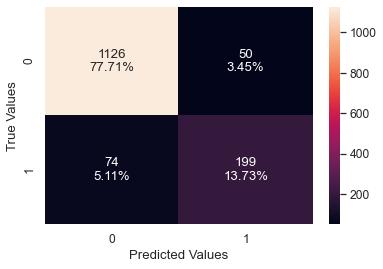

In [121]:
model_matrix(stacking_model,x_test,y_test)

# Comparing models

In [122]:
metrics_df = pd.concat([model_performance(dtree,x_test,y_test).T,
                        model_performance(dtree_tuned,x_test,y_test).T,
                        model_performance(bagging_model,x_test,y_test).T,
                        model_performance(bagging_tuned,x_test,y_test).T,
                        model_performance(rf_model,x_test,y_test).T,
                        model_performance(rf_tuned,x_test,y_test).T,
                        model_performance(ab_model,x_test,y_test).T,
                        model_performance(ab_tuned,x_test,y_test).T,
                        model_performance(gb_model,x_test,y_test).T,
                        model_performance(gb_tuned,x_test,y_test).T,
                        model_performance(xgb_model,x_test,y_test).T,
                        model_performance(stacking_model,x_test,y_test).T
                       ], axis=1)

metrics_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Model",
    "Bagging Tuned",
    "Random Forest Model",
    "Random Forest Tuned",
    "Adaboost Model",
    "Adaboost Tuned",
    "Gradient Boost Model",
    "Gradient Boost Tuned",
    "XGB Model",
    "Stacking Classifier"
]

metrics_df

,Decision Tree,Decision Tree Tuned,Bagging Model,Bagging Tuned,Random Forest Model,Random Forest Tuned,Adaboost Model,Adaboost Tuned,Gradient Boost Model,Gradient Boost Tuned,XGB Model,Stacking Classifier
Accuracy,0.895790,0.887509,0.910973,0.912353,0.906142,0.900621,0.833678,0.881297,0.862664,0.864734,0.915804,0.914424
Recall,0.754579,0.761905,0.652015,0.637363,0.575092,0.615385,0.333333,0.597070,0.410256,0.454212,0.681319,0.728938
Precision,0.710345,0.679739,0.839623,0.861386,0.887006,0.811594,0.606667,0.724444,0.746667,0.725146,0.841629,0.799197
F1,0.731794,0.718480,0.734021,0.732632,0.697778,0.700000,0.430260,0.654618,0.529551,0.558559,0.753036,0.762452


It seems from analysis that Stacking classifier and decision tree models have the best performance. Espeically in 'Recall' which of key importance in our case as we don't want to miss out a potenntial customer and want minimize false negatives